In [29]:
import pandas as pd
import numpy as np
t_set_features = pd.read_csv('training_set_features.csv')
t_set_labels = pd.read_csv('training_set_labels.csv')
# dropping some columns from the training set for their relative insignificance
t_set_features.drop(['employment_industry', 'employment_occupation'], axis = 1, inplace = True)
t_set = pd.merge(t_set_features,t_set_labels)
sub_set= pd.read_csv('test_set_features.csv')
# dropping some columns from the test set for their relative insignificance
sub_set.drop(['employment_industry', 'employment_occupation'], axis = 1, inplace = True)
sub_set.shape

(26708, 34)

### Performing some EDA on the datasets.
#### converting string columns to numeric ones to fit in the data
#### using the correlation matrix below to drop some of the irrelavant columns to increase model accuracy

In [30]:
# Converting the  String columns into numeric ones in the training dataset
t_set['employment'] = t_set['employment_status'].map({'Unemployed' : 0, 'Not in Labor Force' : 1, 'Employed' : 2})
t_set.drop(['employment_status'], axis = 1, inplace = True)
t_set.drop(['hhs_geo_region'], axis=1, inplace = True)
t_set['census_mod'] = t_set['census_msa'].map({'Non-MSA' : 0, 'MSA, Not Principle  City' : 1, 'MSA, Principle City' : 2})
t_set.drop('census_msa', axis = 1, inplace = True)
t_set['own_house'] = t_set['rent_or_own'].map({'Rent' : 0, 'Own' : 1})
t_set.drop('rent_or_own', axis = 1, inplace = True)
t_set['marital_status_yes'] = t_set['marital_status'].map({'Married' : 1, 'Not Married' : 0})
t_set.drop('marital_status', axis = 1, inplace = True)
t_set['income_poverty_mod'] = t_set['income_poverty'].map({'Below Poverty' : 0, '<= $75,000, Above Poverty' : 1, '>= $75,000' : 1})
t_set.drop('income_poverty', axis = 1, inplace = True)
t_set['sex_male'] = t_set['sex'].map({'Female' : 0, 'Male' : 1})
t_set.drop('sex', axis = 1, inplace = True)
t_set.drop('race', axis = 1, inplace = True)
t_set['education_mod'] = t_set['education'].map({'< 12 Years' : 0, '12 Years' : 1, 'Some College' : 2, 'College Graduate' : 3,})
t_set.drop('education', axis = 1, inplace = True)
t_set['age_group_mod'] = t_set['age_group'].map({'18 - 34 Years' : 0, '35 - 44 Years' : 1, '45 - 54 Years' : 2, '55 - 64 Years' : 3, '65+ Years' : 4})
t_set.drop('age_group', axis = 1, inplace = True)

t_set.shape

(26707, 34)

### Performing the EDA on the Test Set

In [31]:
# Converting the  String columns into numeric ones in the test dataset
sub_set['employment'] = sub_set['employment_status'].map({'Unemployed' : 0, 'Not in Labor Force' : 1, 'Employed' : 2})
sub_set.drop(['employment_status'], axis = 1, inplace = True)
sub_set.drop(['hhs_geo_region'], axis=1, inplace = True)
sub_set['census_mod'] = sub_set['census_msa'].map({'Non-MSA' : 0, 'MSA, Not Principle  City' : 1, 'MSA, Principle City' : 2})
sub_set.drop('census_msa', axis = 1, inplace = True)
sub_set['own_house'] = sub_set['rent_or_own'].map({'Rent' : 0, 'Own' : 1})
sub_set.drop('rent_or_own', axis = 1, inplace = True)
sub_set['marital_status_yes'] = sub_set['marital_status'].map({'Married' : 1, 'Not Married' : 0})
sub_set.drop('marital_status', axis = 1, inplace = True)
sub_set['income_poverty_mod'] = sub_set['income_poverty'].map({'Below Poverty' : 0, '<= $75,000, Above Poverty' : 1, '>= $75,000' : 1})
sub_set.drop('income_poverty', axis = 1, inplace = True)
sub_set['sex_male'] = sub_set['sex'].map({'Female' : 0, 'Male' : 1})
sub_set.drop('sex', axis = 1, inplace = True)
sub_set.drop('race', axis = 1, inplace = True)
sub_set['education_mod'] = sub_set['education'].map({'< 12 Years' : 0, '12 Years' : 1, 'Some College' : 2, 'College Graduate' : 3,})
sub_set.drop('education', axis = 1, inplace = True)
sub_set['age_group_mod'] = sub_set['age_group'].map({'18 - 34 Years' : 0, '35 - 44 Years' : 1, '45 - 54 Years' : 2, '55 - 64 Years' : 3, '65+ Years' : 4})
sub_set.drop('age_group', axis = 1, inplace = True)

sub_set.shape

(26708, 32)

#### Plotting the Correlation matrix to check the correlation of each feature and estimate their relative importance in modeling

### Correlation Matrix

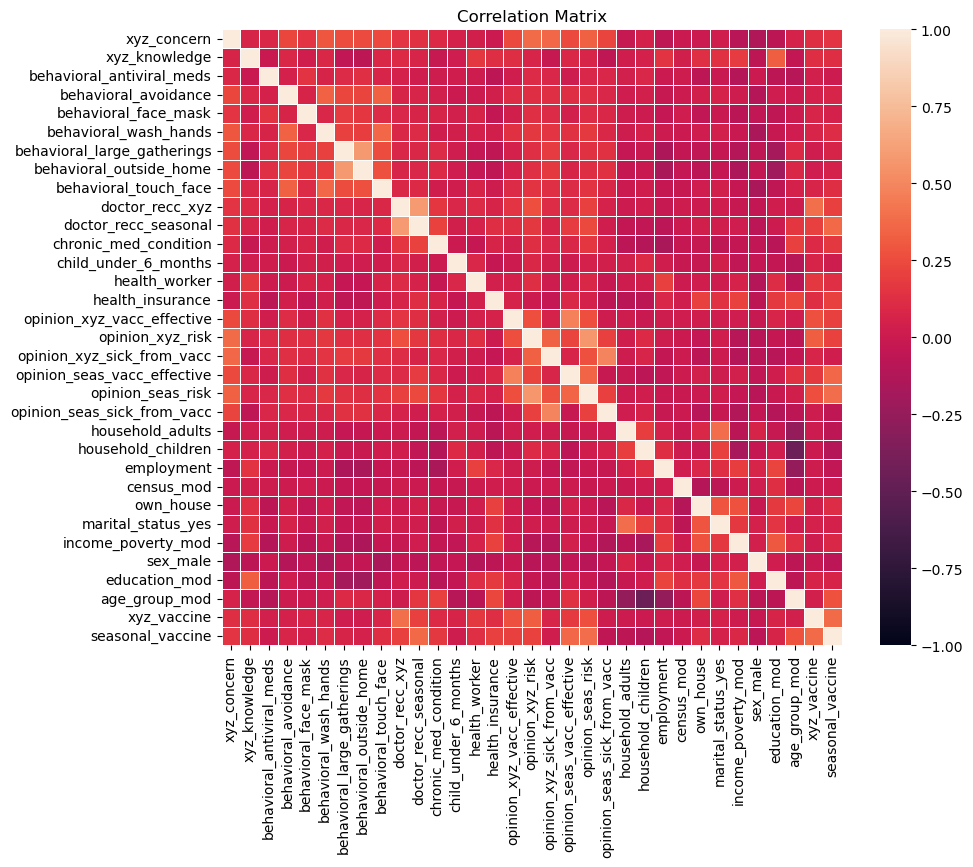

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
features = t_set.drop(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], axis=1)
targets = t_set[['xyz_vaccine', 'seasonal_vaccine']]
# Concatenate features and targets
all_data = pd.concat([features, targets], axis=1)
corr_matrix = all_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, vmax = +1, vmin = -1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### droping the behavioural columns based on observations from the correlation matrix as it has very less effect and affects the ROC AUC of the model later. Some other columns could be droped too to increase the Mean ROC-AUC score

In [33]:

#t_set.drop('health_insurance', axis = 1, inplace =True)
#t_set.drop('income_poverty_mod', axis = 1, inplace =True)
#t_set['xyz_concern']= t_set['xyz_concern'].fillna(t_set['xyz_concern'].mode()[0])
#t_set['xyz_knowledge']= t_set['xyz_knowledge'].fillna(0)
#t_set.drop('xyz_knowledge', axis = 1, inplace = True)
#t_set.drop('education_mod', axis = 1, inplace = True)
#t_set.dropna(how = 'any', inplace = True)

t_set.drop('behavioral_antiviral_meds', axis = 1, inplace = True)
t_set.drop('behavioral_avoidance', axis = 1, inplace = True)
t_set.drop('behavioral_face_mask', axis = 1, inplace = True)
t_set.drop('behavioral_wash_hands', axis = 1, inplace = True)
t_set.drop('behavioral_large_gatherings', axis = 1, inplace = True)
t_set.drop('behavioral_outside_home', axis = 1, inplace = True)
t_set.drop('behavioral_touch_face', axis = 1, inplace = True)

#sub_set.drop('health_insurance', axis = 1, inplace =True)
#sub_set.drop('income_poverty_mod', axis = 1, inplace =True)
#sub_set['xyz_concern']= sub_set['xyz_concern'].fillna(sub_set['xyz_concern'].mode()[0])
#sub_set['xyz_knowledge']= sub_set['xyz_knowledge'].fillna(0)
#sub_set.drop('xyz_knowledge', axis = 1, inplace = True)
#sub_set.drop('education_mod', axis = 1, inplace = True)

sub_set.drop('behavioral_antiviral_meds', axis = 1, inplace = True)
sub_set.drop('behavioral_avoidance', axis = 1, inplace = True)
sub_set.drop('behavioral_face_mask', axis = 1, inplace = True)
sub_set.drop('behavioral_wash_hands', axis = 1, inplace = True)
sub_set.drop('behavioral_large_gatherings', axis = 1, inplace = True)
sub_set.drop('behavioral_outside_home', axis = 1, inplace = True)
sub_set.drop('behavioral_touch_face', axis = 1, inplace = True)


### Plotting the heatmap to check the missing values in the columns in the Test set

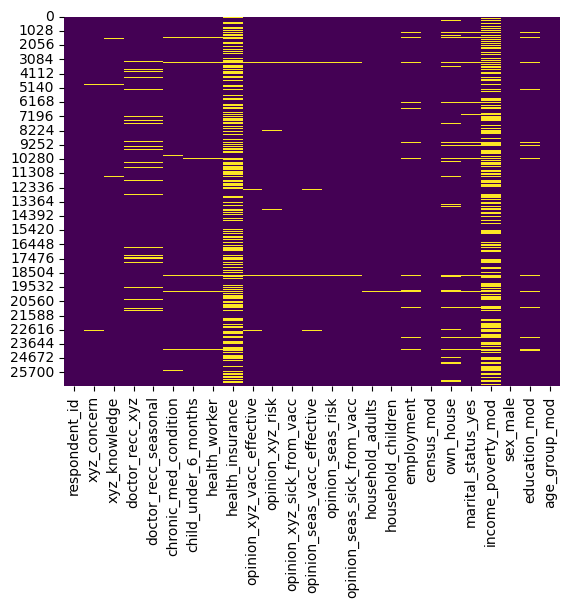

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
missing = sub_set.isnull()
sns.heatmap(missing, cbar=False, cmap='viridis')
plt.show()

In [35]:
#t_set.drop('health_insurance', axis = 1, inplace =True)
#t_set.drop('income_poverty_mod', axis = 1, inplace =True)
#sub_set.drop('health_insurance', axis = 1, inplace =True)
#sub_set.drop('income_poverty_mod', axis = 1, inplace =True)
#t_set['doctor_recc_xyz']= t_set['doctor_recc_xyz'].fillna(t_set['doctor_recc_xyz'].mode()[0])
#t_set['doctor_recc_seasonal']= t_set['doctor_recc_seasonal'].fillna(t_set['doctor_recc_seasonal'].mode()[0])
#sub_set['doctor_recc_xyz']= sub_set['doctor_recc_xyz'].fillna(sub_set['doctor_recc_xyz'].mode()[0])
#sub_set['doctor_recc_seasonal']= sub_set['doctor_recc_seasonal'].fillna(sub_set['doctor_recc_seasonal'].mode()[0])


### Plotting the heatmap to check the missing values in the columns in the Training set

(26707, 27)


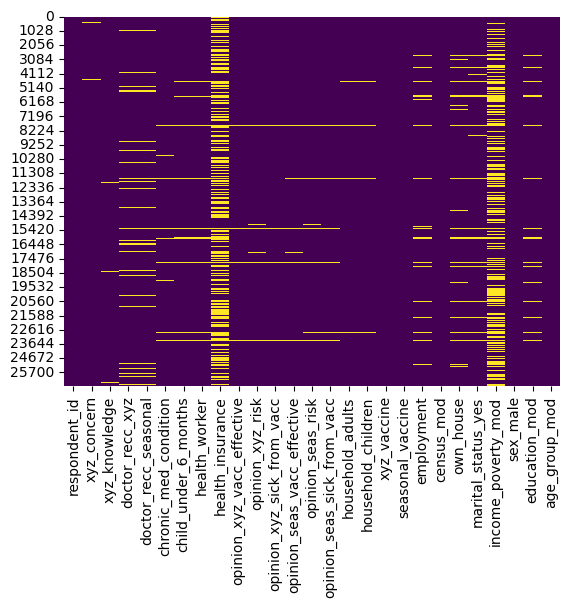

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
missing = t_set.isnull()
print(t_set.shape)
sns.heatmap(missing, cbar=False, cmap='viridis')
plt.show()

On first look it may seem that dropping the 'health_insurance' and 'income_poverty' columns could be a good choice but on thinking this columns could have significant impact on weather a person would take a vaccine or not. And it is seen that taking these two columns improve the efficiency of the mean RUC-AUC score.

## Choosing the Histogram Gradient Boosting Classifier
### --> Training with this model that accepts the 'NaN' or null values, since the Test set also has many empty values. 

HistGradientBoostingClassifier - Target 1 - Accuracy: 0.8527, F1 Score: 0.5889, ROC AUC: 0.8650
HistGradientBoostingClassifier - Target 2 - Accuracy: 0.7861, F1 Score: 0.7648, ROC AUC: 0.8624
   respondent_id  xyz_vaccine  seasonal_vaccine
0              3     0.032175          0.912599
1              6     0.025541          0.175514
2             17     0.125483          0.373768
3             29     0.291362          0.467104
4             30     0.099827          0.441542


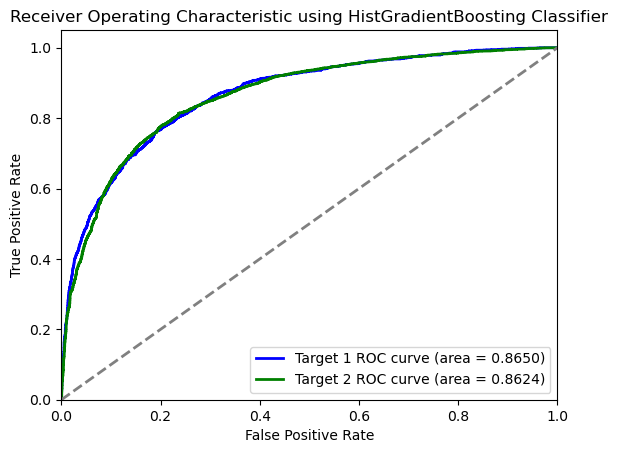

mean score =  0.8637416842418828


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


#Separating features and target variables
X = t_set.drop(columns=['xyz_vaccine', 'seasonal_vaccine', 'respondent_id'])
y1 = t_set['xyz_vaccine']
y2 = t_set['seasonal_vaccine']
respondent_ids = t_set['respondent_id']

# Spliting the dataset into training and testing sets for evaluation purpose
X_train, X_test, y_train1, y_test1, ids_train, ids_test = train_test_split(X, y1, respondent_ids, test_size=0.3, random_state=42)
_, _, y_train2, y_test2, _, _ = train_test_split(X, y2, respondent_ids, test_size=0.3, random_state=42)

# Initializing the HistGradientBoostingClassifier model
hgb1 = HistGradientBoostingClassifier(random_state=42)
hgb2 = HistGradientBoostingClassifier(random_state=42)

# Train the HistGradientBoostingClassifier model for the first target variable
hgb1.fit(X_train, y_train1)

# Predict probabilities on the test set for the first target variable
y_pred_proba1 = hgb1.predict_proba(X_test)[:, 1]

accuracy1 = accuracy_score(y_test1, hgb1.predict(X_test))
f1_1 = f1_score(y_test1, hgb1.predict(X_test))
roc_auc1 = roc_auc_score(y_test1, y_pred_proba1)

print(f'HistGradientBoostingClassifier - Target 1 - Accuracy: {accuracy1:.4f}, F1 Score: {f1_1:.4f}, ROC AUC: {roc_auc1:.4f}')

# Train the HistGradientBoostingClassifier model for the second target variable
hgb2.fit(X_train, y_train2)

# Predict probabilities on the test set for the second target variable
y_pred_proba2 = hgb2.predict_proba(X_test)[:, 1]

accuracy2 = accuracy_score(y_test2, hgb2.predict(X_test))
f1_2 = f1_score(y_test2, hgb2.predict(X_test))
roc_auc2 = roc_auc_score(y_test2, y_pred_proba2)

print(f'HistGradientBoostingClassifier - Target 2 - Accuracy: {accuracy2:.4f}, F1 Score: {f1_2:.4f}, ROC AUC: {roc_auc2:.4f}')

# Create a DataFrame to store the predicted probabilities
result_df = pd.DataFrame({'respondent_id': ids_test,'xyz_vaccine': y_pred_proba1,'seasonal_vaccine': y_pred_proba2})
result_df = result_df.sort_values(by='respondent_id').reset_index(drop=True)

print(result_df.head())

fpr1, tpr1, _ = roc_curve(y_test1, y_pred_proba1)
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_proba2)
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Target 1 ROC curve (area = {roc_auc1:.4f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Target 2 ROC curve (area = {roc_auc2:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic using HistGradientBoosting Classifier')
plt.legend(loc='lower right')
plt.show()
print("mean score = ", ((roc_auc1+roc_auc2)/2))

### Final Result using the Same HistGradientBoosting Classifier and the Multioutput Classifier

---> here we make the final csv file of the predicted probabilities on the test set using the HistGradientBoosting algorithm on the entire training dataset

HistGradientBoostingClassifier - Target 1 - Validation Accuracy: 0.8611, ROC AUC: 0.8696
HistGradientBoostingClassifier - Target 2 - Validation Accuracy: 0.7886, ROC AUC: 0.8667
Macro Mean ROC AUC: 0.8681


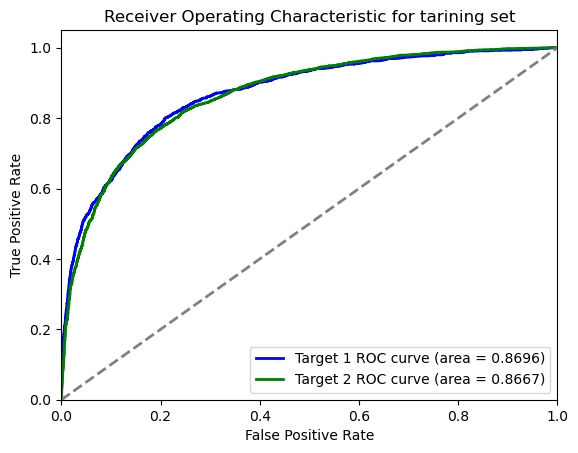

   respondent_id  xyz_vaccine  seasonal_vaccine
0          26707     0.157824          0.232240
1          26708     0.039241          0.040199
2          26709     0.180306          0.715298
3          26710     0.688156          0.899396
4          26711     0.510208          0.589624


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

X_train = t_set.drop(columns=['xyz_vaccine', 'seasonal_vaccine', 'respondent_id'])
y_train = t_set[['xyz_vaccine', 'seasonal_vaccine']]

# Extract features from the submission dataset
X_sub = sub_set.drop(columns=['respondent_id'])
respondent_ids = sub_set['respondent_id']

# Split the training set for the purpose of evaluation of the model 
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# Initialize the HistGradientBoostingClassifier model
hgb = HistGradientBoostingClassifier(random_state=1)

# Wrap the classifier with Multi-outputClassifier  to handle multiple target variables
multi_target_hgb = MultiOutputClassifier(hgb, n_jobs=-1)

# Train the model on the training split
multi_target_hgb.fit(X_train_split, y_train_split)

# Predict probabilities on the validation set
y_pred_proba_val = multi_target_hgb.predict_proba(X_val)

# Extract probabilities for each target variable
y_pred_proba1_val = y_pred_proba_val[0][:, 1]
y_pred_proba2_val = y_pred_proba_val[1][:, 1]

# Calculate metrics for the validation set
accuracy1_val = accuracy_score(y_val['xyz_vaccine'], (y_pred_proba1_val > 0.5).astype(int))
roc_auc1_val = roc_auc_score(y_val['xyz_vaccine'], y_pred_proba1_val)
accuracy2_val = accuracy_score(y_val['seasonal_vaccine'], (y_pred_proba2_val > 0.5).astype(int))
roc_auc2_val = roc_auc_score(y_val['seasonal_vaccine'], y_pred_proba2_val)

print(f'HistGradientBoostingClassifier - Target 1 - Validation Accuracy: {accuracy1_val:.4f}, ROC AUC: {roc_auc1_val:.4f}')
print(f'HistGradientBoostingClassifier - Target 2 - Validation Accuracy: {accuracy2_val:.4f}, ROC AUC: {roc_auc2_val:.4f}')

# Mean ROC AUC score using macro average
roc_auc_macro_val = roc_auc_score(y_val, np.column_stack((y_pred_proba1_val, y_pred_proba2_val)), average='macro')
print(f'Macro Mean ROC AUC: {roc_auc_macro_val:.4f}')

# Plot ROC AUC curves for validation set
fpr1_val, tpr1_val, _ = roc_curve(y_val['xyz_vaccine'], y_pred_proba1_val)
fpr2_val, tpr2_val, _ = roc_curve(y_val['seasonal_vaccine'], y_pred_proba2_val)

plt.figure()
plt.plot(fpr1_val, tpr1_val, color='blue', lw=2, label=f'Target 1 ROC curve (area = {roc_auc1_val:.4f})')
plt.plot(fpr2_val, tpr2_val, color='green', lw=2, label=f'Target 2 ROC curve (area = {roc_auc2_val:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for tarining set')
plt.legend(loc='lower right')
plt.show()


# Finally Training the HistGradientBoostingClassifier model on the entire training dataset for final prediction
multi_target_hgb.fit(X_train, y_train)

# Predict probabilities on the submission dataset for both target variables
y_pred_proba_sub = multi_target_hgb.predict_proba(X_sub)

# Extract probabilities for each target variable
y_pred_proba1_sub = y_pred_proba_sub[0][:, 1]
y_pred_proba2_sub = y_pred_proba_sub[1][:, 1]

# Creating a DataFrame to store the predicted probabilities
result_df = pd.DataFrame({'respondent_id': respondent_ids,'xyz_vaccine': y_pred_proba1_sub,'seasonal_vaccine': y_pred_proba2_sub})

# Sorting the DataFrame by respondent_id in ascending order
result_df = result_df.sort_values(by='respondent_id').reset_index(drop=True)

print(result_df.head())

# Saving into CSV file
result_df.to_csv('final.csv', index=False)

# -----.----- END OF ACTUAL ANALYSIS -----.-----

### Performing some EDA again to fit into the SVM model with linear kernel
---> This is just for comparision with this model to check the ROC-AUC curve

(26707, 27)


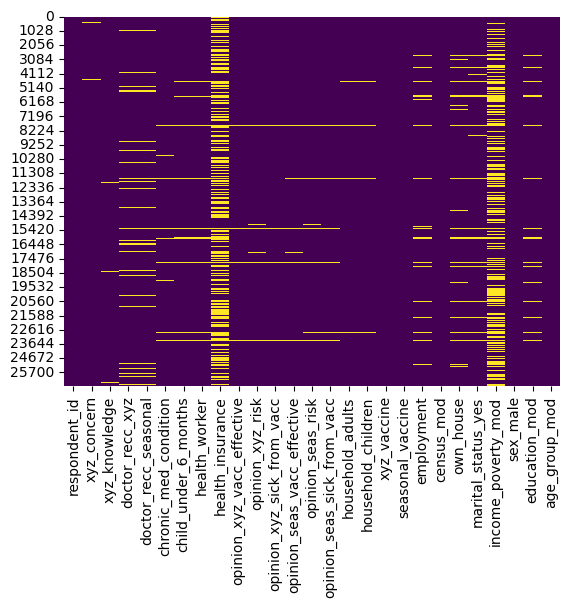

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
missing = t_set.isnull()
print(t_set.shape)
sns.heatmap(missing, cbar=False, cmap='viridis')
plt.show()

### filling some missing values with the mode values of those columns 
---> choosing mode to replace because of the categorical nature of the data and assuming that a person would do what the whole population does...

(22201, 25)


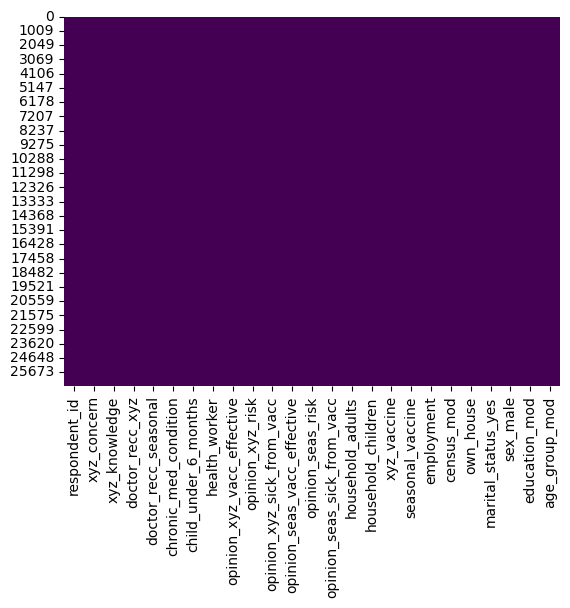

In [27]:
t_set.drop('health_insurance', axis = 1, inplace =True)
t_set.drop('income_poverty_mod', axis = 1, inplace =True)
sub_set.drop('health_insurance', axis = 1, inplace =True)
sub_set.drop('income_poverty_mod', axis = 1, inplace =True)

t_set['xyz_concern']= t_set['xyz_concern'].fillna(t_set['xyz_concern'].mode()[0])
t_set['xyz_knowledge']= t_set['xyz_knowledge'].fillna(t_set['xyz_knowledge'].mode()[0])
sub_set['xyz_concern']= sub_set['xyz_concern'].fillna(sub_set['xyz_concern'].mode()[0])
sub_set['xyz_knowledge']= sub_set['xyz_knowledge'].fillna(sub_set['xyz_knowledge'].mode()[0])

t_set.dropna(how = 'any', inplace = True)
sub_set.dropna(how = 'any', inplace = True)
missing = t_set.isnull()
print(t_set.shape)

sns.heatmap(missing, cbar=False, cmap='viridis')
plt.show()


### the SVM algorithm implemented

LinearSVC - Target 1 - Validation Accuracy: 0.8250, ROC AUC: 0.8324
LinearSVC - Target 2 - Validation Accuracy: 0.7750, ROC AUC: 0.8498
Macro Mean ROC AUC: 0.8411


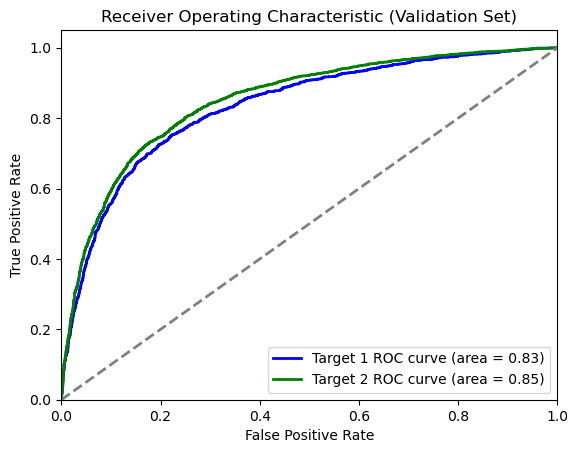

   respondent_id  xyz_vaccine  seasonal_vaccine
0          26707     0.091876          0.205159
1          26708     0.045535          0.051642
2          26709     0.415314          0.707247
3          26710     0.473343          0.890589
4          26711     0.230578          0.531837


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

X_train = t_set.drop(columns=['xyz_vaccine', 'seasonal_vaccine', 'respondent_id'])
y_train = t_set[['xyz_vaccine', 'seasonal_vaccine']]

X_sub = sub_set.drop(columns=['respondent_id'])
respondent_ids = sub_set['respondent_id']

# Split the training set for evaluation purpose
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

svc = LinearSVC(random_state=42)

# Usin CalibratedClassifierCV to enable probability prediction
calibrated_svc = CalibratedClassifierCV(svc, method='sigmoid', cv=5)

# Wrap the classifier with MultiOutputClassifier to handle multiple target variables
multi_target_svc = MultiOutputClassifier(calibrated_svc, n_jobs=-1)

# Train the model on the training split
multi_target_svc.fit(X_train_split, y_train_split)

# Predict probabilities on the validation set
y_pred_proba_val = multi_target_svc.predict_proba(X_val)

# Extract probabilities for each target variable
y_pred_proba1_val = y_pred_proba_val[0][:, 1]
y_pred_proba2_val = y_pred_proba_val[1][:, 1]

accuracy1_val = accuracy_score(y_val['xyz_vaccine'], (y_pred_proba1_val > 0.5).astype(int))
roc_auc1_val = roc_auc_score(y_val['xyz_vaccine'], y_pred_proba1_val)
accuracy2_val = accuracy_score(y_val['seasonal_vaccine'], (y_pred_proba2_val > 0.5).astype(int))
roc_auc2_val = roc_auc_score(y_val['seasonal_vaccine'], y_pred_proba2_val)

print(f'LinearSVC - Target 1 - Validation Accuracy: {accuracy1_val:.4f}, ROC AUC: {roc_auc1_val:.4f}')
print(f'LinearSVC - Target 2 - Validation Accuracy: {accuracy2_val:.4f}, ROC AUC: {roc_auc2_val:.4f}')

roc_auc_macro_val = roc_auc_score(y_val, np.column_stack((y_pred_proba1_val, y_pred_proba2_val)), average='macro')
print(f'Macro Mean ROC AUC: {roc_auc_macro_val:.4f}')

fpr1_val, tpr1_val, _ = roc_curve(y_val['xyz_vaccine'], y_pred_proba1_val)
fpr2_val, tpr2_val, _ = roc_curve(y_val['seasonal_vaccine'], y_pred_proba2_val)

plt.figure()
plt.plot(fpr1_val, tpr1_val, color='blue', lw=2, label=f'Target 1 ROC curve (area = {roc_auc1_val:.2f})')
plt.plot(fpr2_val, tpr2_val, color='green', lw=2, label=f'Target 2 ROC curve (area = {roc_auc2_val:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation Set)')
plt.legend(loc='lower right')
plt.show()

# Train the LinearSVC model on the entire training dataset for final prediction

multi_target_svc.fit(X_train, y_train)
y_pred_proba_sub = multi_target_svc.predict_proba(X_sub)
y_pred_proba1_sub = y_pred_proba_sub[0][:, 1]
y_pred_proba2_sub = y_pred_proba_sub[1][:, 1]
result_df = pd.DataFrame({'respondent_id': respondent_ids, 'xyz_vaccine': y_pred_proba1_sub,'seasonal_vaccine': y_pred_proba2_sub})
result_df = result_df.sort_values(by='respondent_id').reset_index(drop=True)
print(result_df.head())
result_df.to_csv('predicted_probabilities_SVM.csv', index=False)

#### thus we see that the performance and ROC-AUC are both slightly better for the 'Histogram Gradient Boosting' Algorithm than the 'Support Vector Machines' Algorithm with a 'Linear' kernel on this particular dataset. So we use that previous model to predict the probabilities of the test set.